# Module 3 Assignment: Exploring Australia's coral reefs

Welcome to this module's assignment! 

Carefully read each Markdown (text) cell, which include instructions and hints. Start by reading the background behind your upcoming tasks.

When you are done, submit your solution by saving it, then clicking on the blue submit button at the top of the page.

## Background:
You've just joined a marine conservation team analyzing ocean data from the Integrated Marine Observing System (IMOS) to monitor Australia's coastal ecosystems. Your task is to explore trends in ocean conditions helping the team identify environmental conditions that impact marine life. This analysis will directly contribute to conservation strategies that protect Australia's biodiversity. 

You will be working with the daily average measurements given by the Australian Institute of Marine Biology. You will use the following features:

* 'STATION_ID': ID of the measuring site
* 'SAMPLE_DAY': date of the sample
* 'CHL_QA_AVG': average daily concentration of chlorophyll per unit volume of the water body, measured in ug/L (micro grams per liter)
* 'NTU_QA_AVG': average turbidity of the water body measured in NTU (Nephelometric Turbidity Unit). Turbidity measures the cloudiness or haziness of a fluid due to suspended particles.


## Table of Contents
- [Step 1: Importing Libraries](#step-1)
- [Step 2: Load the Data](#step-2)
- [Step 3: Visualizing the Data](#step-3)
    - [Median Measurements](#plot-the-data)
        - [Exercise 1: Plot the Median per Site](#ex1)
    - [Correlation Between Measurements](#correlation-between-the-measurements)
        - [Exercise 2: Correlation](#ex2) 
    - [Distributions](#distributions)
        - [Exercise 3: Burdekin River Histogram](#ex3)
        - [Exercise 4: Multiple Histograms](#ex4)
        - [Exercise 5: Box plots](#ex5)
        - [Exercise 6: Save the Plot](#ex6)

<a id="step-1"></a>

## Step 1: Importing libraries

**▶▶▶ Directions** 
    
1. Run the cell below to import the following libraries: Pandas, Matplotlib's Pyplot and Seaborn
        
</div>

In [1]:
# 🔒This cell is locked. You will not be able to edit it.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<a id="step-2"></a>

## Step 2: Load the Data

Now that you have imported the right libraries, you can use Pandas to load the data from the csv. 


In [2]:
# 🔒This cell is locked. You will not be able to edit it.

#Load the data
measurements = pd.read_csv("data/combined_marine_dataset_3sites.csv")
measurements.head()

,STATION_ID,MMP_SITE_NAME,LONGITUDE,LATITUDE,LOGGER_SERIAL,SAMPLE_DAY,CHL_QA_AVG,NTU_QA_AVG
0,BUR13,Burdekin River mouth mooring,147.5822,-19.5875,1958,2015-03-22,1.910,3.901
1,BUR13,Burdekin River mouth mooring,147.5822,-19.5875,1958,2015-03-23,1.935,3.958
2,BUR13,Burdekin River mouth mooring,147.5822,-19.5875,1958,2015-03-24,1.867,2.408
3,BUR13,Burdekin River mouth mooring,147.5822,-19.5875,1958,2015-03-25,2.166,1.352
4,BUR13,Burdekin River mouth mooring,147.5822,-19.5875,1958,2015-03-26,1.911,1.058


<a id="step-3"></a>

## Step 3: Visualizing the Data

<a id="plot-the-data"></a>

Understanding and monitoring turbidity and chlorophyll levels is crucial for maintaining healthy, thriving coral reefs. Turbidity indicates sediment pollution, which can quickly damage coral ecosystems. Similarly, chlorophyll helps track long-term nutrient pollution. Elevated chlorophyll levels often signal excess nutrients, which can be harmful to coral survival.

### Median Values

<a id="ex1"></a>

#### Exercise 1: Plot the Median per Site
You want to identify the most significant water quality events at your three monitoring sites by looking at peak turbidity and chlorophyll levels. This will help you better understand water quality patterns.

<div style="background-color: #C6E2FF; padding: 10px; border-radius: 3px; box-shadow: 0 2px 4px rgba(0, 0, 0, 0.1); width:95%
">

**▶▶▶ Directions**

1. Group the `measurements` DataFrame by `"STATION_ID"`.  
2. Select the `"NTU_QA_AVG"` and `"CHL_QA_AVG"` columns (in that order) and compute the median for each group. **You can do steps 1 and 2 in a single line**
3. Create a bar chart showing the median of `"NTU_QA_AVG"` and `"CHL_QA_AVG"` per site.  
   - Use a figure size of (8, 4).  
4. Customize the plot:  
   - Set the x-axis label to **"Station ID"** with font size 14.  
   - Set the y-axis label to **"Values"** with font size 14.  
   - Set the plot title to **"Median NTU and CHL measurements per site"** with font size 16.  
   - Set x-tick rotation to 0.  
   - Remove the top and right spines.

</div>

**Please do not make any other changes to the plot, otherwise you might fail the grader.**

<Figure size 800x400 with 0 Axes>

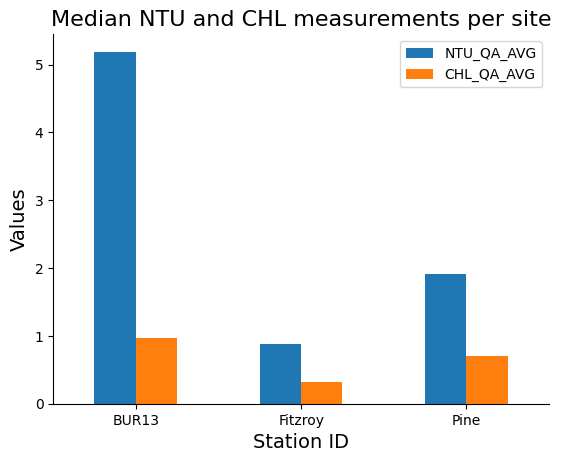

In [21]:
# GRADED CELL: exercise 1

### START CODE HERE ###

# group the measurements by STATION_ID 
# and find the median values for NTU_QA_AVG and CHL_QA_AVG
list_features = ["NTU_QA_AVG", "CHL_QA_AVG"]
grouped_measurements = measurements.groupby("STATION_ID")[["NTU_QA_AVG", "CHL_QA_AVG"]].median()

# plot the column chart. set the figsize to (8,4)
ax_bar = plt.figure(figsize=(8,4))
ax_bar = grouped_measurements.plot(kind="bar")

# customize the plot
# set the x-axis label
plt.xlabel("Station ID", fontsize=14)

# set the y-axis label
plt.ylabel("Values", fontsize=14)

# set the title
plt.title("Median NTU and CHL measurements per site", fontsize=16)

# rotate the x-axis labels
plt.xticks(rotation=0)

# remove top spine
ax_bar.spines["top"].set_visible(False)
# remove right spine
ax_bar.spines["right"].set_visible(False)

### END CODE HERE ###
plt.show()

Based on this chart, which site should be monitored more closely?

<a id="correlation-between-measurements"></a>

### Correlation Between Measurements

You also want to learn if there's any correlation between chlorophyll concentration and turbidity. Create a scatter plot of these two variables for the Burdekin River site.

<a id="ex1"></a>

#### Exercise 2: Correlation

<div style="background-color: #C6E2FF; padding: 10px; border-radius: 3px; box-shadow: 0 2px 4px rgba(0, 0, 0, 0.1); width:95%">

**▶▶▶ Directions**  

1. Create a scatter plot displaying the chlorophyll levels (`CHL_QA_AVG`) on the x-axis, and the turbidity (`NTU_QA_AVG`) on the y-axis.  
2. The chart should have the following customizations:  
   1. Use square markers in color <code>"darkorange"</code>, and a size of 10.  
   2. Set `alpha` to 0.6.  
   3. Change the x-axis label to "Chlorophyll levels (ug/L)" and the y-axis label to "Turbidity (NTU)". Use a font size of 14.  
   4. Set the title to "Correlation between chlorophyll concentration \n and turbidity for Burdekin River", with a font size of 16. Make sure to use the exact title as shown here.  
3. The chart should be stored in a variable named `chl_ntu_scatter`.

</div>


**Please do not make any other changes to the plot, otherwise you might fail the grader.**

<Figure size 640x480 with 0 Axes>

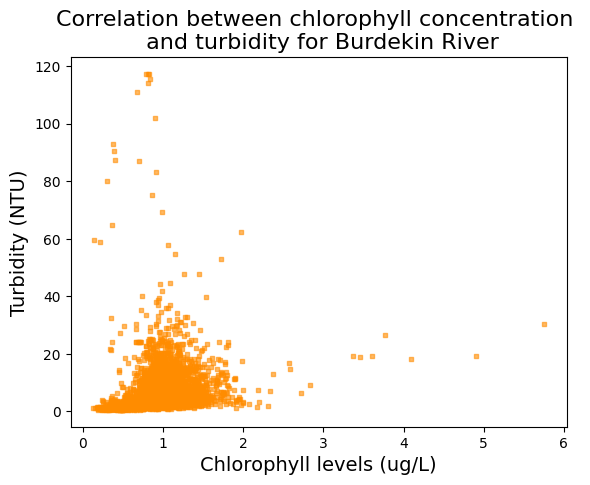

In [14]:
# GRADED CELL: Exercise 2

# extract the measurements for the Burdekin River
bur13_measurements = measurements[measurements["STATION_ID"] == "BUR13"]

plt.figure()

### START CODE HERE ###

# create the scatterplot
chl_ntu_scatter = bur13_measurements.plot(kind="scatter", x="CHL_QA_AVG", y="NTU_QA_AVG", marker="s", color="darkorange", s=10, alpha=0.6)

# set the title
plt.title("Correlation between chlorophyll concentration \n and turbidity for Burdekin River", fontsize=16)

# set the x label
plt.xlabel("Chlorophyll levels (ug/L)", fontsize=14)

# set the y label
plt.ylabel("Turbidity (NTU)", fontsize=14)

### END CODE HERE ###
plt.show()

How do you expect this correlation between variables to be? Positive or negative? Weak, moderate or strong? Run the cell below to find out!

In [15]:
print("The correlation between turbidity and chlorophyll for the Burdekin River site is:", round(bur13_measurements["NTU_QA_AVG"].corr(bur13_measurements["CHL_QA_AVG"]),4))

The correlation between turbidity and chlorophyll for the Burdekin River site is: 0.1779


<a id="distributions"></a>

### Distributions

<a id="ex3"></a>

#### Exercise 3: Burdekin River Histogram

You want to explore the distribution of chlorophyll measurements at the Burdekin River site to understand the variability and potential environmental factors influencing its chlorophyll concentrations.

<div style="background-color: #C6E2FF; padding: 10px; border-radius: 3px; box-shadow: 0 2px 4px rgba(0, 0, 0, 0.1); width:95%">

**▶▶▶ Directions** 
    
1. Using the **Seaborn** library, plot the histogram for the chlorophyll at the Burdekin River site:
    - Use a `binwidth` of 0.1  
    - Plot the KDE  
    - Use the color `"royalblue"` and an alpha of 0.2  
2. Save the plot in the variable `bur13_hist_ax`  
3. Change the x-axis label to "Chlorophyll concentration (ug/L)"  
4. Set the title to "Distribution of the chlorophyll concentration at the Burdekin River site". Make sure to use the exact title as shown here.  
5. Add a y-axis grid line, with dotted style, and an opacity of 0.7  

</div>

**Please do not make any other changes to the plot, otherwise you might fail the grader.**

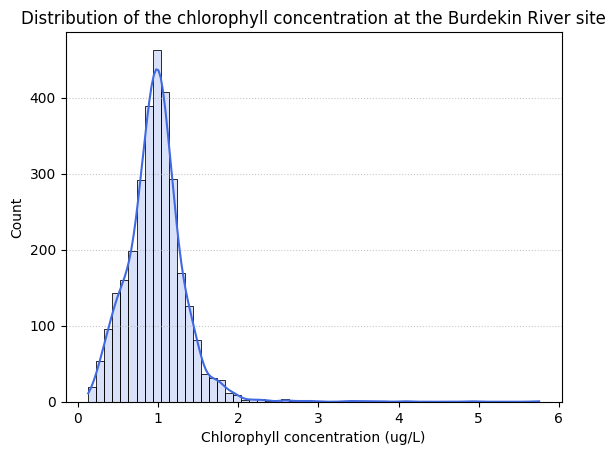

In [18]:
# GRADED CELL: Exercise 3

plt.figure()

### START CODE HERE ###
 
# create the histogram
bur13_hist_ax = sns.histplot(bur13_measurements, x="CHL_QA_AVG",
                             binwidth=0.1,
                             kde=True,
                             color="royalblue", alpha=0.2)

# set the xlabel 
plt.xlabel("Chlorophyll concentration (ug/L)")

# set the title
plt.title("Distribution of the chlorophyll concentration at the Burdekin River site")

# add grid on the y axis
plt.grid(axis="y", linestyle="dotted", alpha=0.7)

### END CODE HERE ###

plt.show()

What can you say about the distribution for CHL in the Burdekin River site? 

<a id="ex4"></a>

#### Exercise 4: Multiple Histograms

Building on your insights from the Burdekin River site, you want to compare the chlorophyll and turbidity distributions across all three monitoring sites to understand the broader water quality patterns and variations.

<div style="background-color: #C6E2FF; padding: 10px; border-radius: 3px; box-shadow: 0 2px 4px rgba(0, 0, 0, 0.1); width:95%">

**▶▶▶ Directions** 
    
1. You will need to create a plot with 2 subplots organized in 2 rows and 1 column.  
2. Create the first subplot (first row). Save it into the variable `hist_ax1`  
3. In this subplot, show the histogram for the chlorophyll concentration for each site, using the Seaborn library.  
4. Make it pretty:  
    - Change the x-axis label to "Chlorophyll concentration (ug/L)"  
    - Set the title to "Distribution of the chlorophyll concentration"  
5. Create the second subplot (second row). Save it into the variable `hist_ax2`  
6. Using Seaborn, create the histogram for the turbidity for each site  
7. Make it pretty:  
    - Change the x-axis label to "Turbidity (NTU)"  
    - Set the title to "Distribution of the turbidity"  

</div>

**Please do not make any other changes to the plot, otherwise you might fail the grader.**


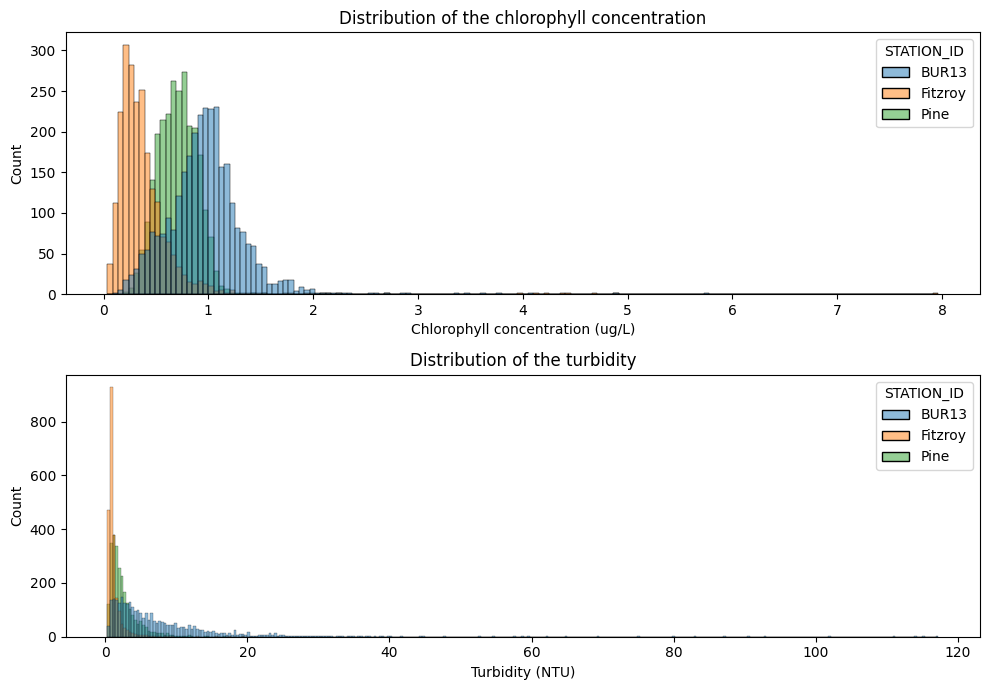

In [19]:
# GRADED CELL: Exercise 4

plt.figure(figsize=(10,7))

### START CODE HERE ###

# select the subplot for the CHL histogram
hist_ax1 = plt.subplot(2,1,1)

# create the histogram for CHL
sns.histplot(measurements, x="CHL_QA_AVG", hue="STATION_ID")

# set the xlabel 
plt.xlabel("Chlorophyll concentration (ug/L)")
# set the title
plt.title("Distribution of the chlorophyll concentration")


# Repeat for NTU histogram
# select the subplot for the NTU histogram
hist_ax2 = plt.subplot(2,1,2)

# create the histogram for NTU
sns.histplot(measurements, x="NTU_QA_AVG", hue="STATION_ID")

# set the xlabel 
plt.xlabel("Turbidity (NTU)")

# set the title
plt.title("Distribution of the turbidity")

### END CODE HERE ###

plt.tight_layout()
plt.show()

Try answering the following questions:

* Do you think the chlorophyll at different sites is distributed the same?
* What can you say about the mode of the distribution for each site?
* Are any of the distributions skewed? If so, which ones? What is the sign of the skew? 
* Which site has a more skewed distribution for turbidity? What does that say about the health of its waters? 
* Do all the distributions have a similar spread? 
* Can you say anything about outliers?

<a id="ex5"></a>

#### Exercise 5: Box plots

Some of this questions are hard to answer using the histograms. While histograms give the full picture of the distribution, boxplots are a great way to get some further insights. By synthesizing information about quartiles, and outliers they can be of great help as well!

<div style="background-color: #C6E2FF; padding: 10px; border-radius: 3px; box-shadow: 0 2px 4px rgba(0, 0, 0, 0.1); width:95%">

**▶▶▶ Directions** 
        
1. Using the Seaborn library, plot a box plot of the chlorophyll concentration for each site.  
2. Save the plot in the variable `boxplot_ax`  
3. Change the x-axis label to "Chlorophyll concentration (ug/L)"  
4. Set the title to "Box plot of the chlorophyll concentration"  

</div>

**Please do not make any other changes to the plot, otherwise you might fail the grader.**


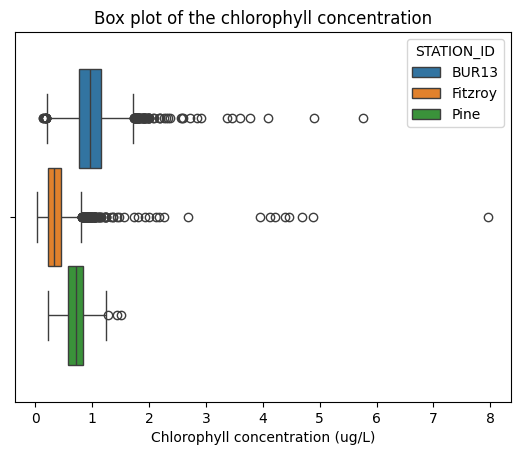

In [22]:
# GRADED CELL: Exercise 5

boxplot_ax = plt.figure()

### START CODE HERE ###

# create the boxplot
sns.boxplot(measurements, x="CHL_QA_AVG", hue="STATION_ID")

# set the xlabel
plt.xlabel("Chlorophyll concentration (ug/L)")

# set the title
plt.title("Box plot of the chlorophyll concentration")

### END CODE HERE ###

plt.show()